In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# pip install plot-keras-history
# https://pypi.org/project/plot-keras-history/
from plot_keras_history import show_history, plot_history

# Import our input dataset
loan_df = pd.read_csv('Data_Source/loan.csv')
#loan_df.head()

C:\Users\Owen\AppData\Local\Temp\ipykernel_23300\3462729078.py:15: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('Data_Source/loan.csv')


In [2]:
# round interest rate to whole number to measure accuracy within 1%
    # has been tested, with no real improvement because of how r2 scores work

# loan_df_interest_rounded = list(loan_df['int_rate'])
# interest_rounded_list = []

# for number in loan_df_interest_rounded:
#     interest_rounded_list.append(round(number * 2) / 2)

# loan_df['interest_rounded'] = interest_rounded_list

# Predicting Grade or Sub Grade

In [3]:
# split into labels and features

y = loan_df['grade']           # use either grade or sub_grade
#y = loan_df['sub_grade']

# in X, *always* keep 'annual_inc', 'dti', 'loan_amnt', 'term' - thanks Jerry!
X = loan_df[['home_ownership', 'annual_inc', 'loan_amnt', 'term', 'dti', 'mort_acc', 'open_acc',
             'pub_rec', 'emp_length', 'tot_cur_bal', 'loan_status', 'revol_util', 'acc_now_delinq']] # 'revol_util', 'acc_now_delinq'

# can also try:
# 'employment_length'
# 'title'
# 'pub_rec_bankruptcies'
# 'tot_cur_bal'
# 'loan_status'

In [4]:
# find rows with null values in specific columns
#X.query('annual_inc != annual_inc') # 'column_name != column_name' shows where NaNs exist

In [5]:
# drop the 4 nulls from annual_inc
#X = X.drop(index=[2141934, 2141935, 2141965, 2142018])
#y = y.drop(index=[2141934, 2141935, 2141965, 2142018])

    # this and previous cell updated to use for loop below

In [6]:
# drop rows with null values in each column

# get column names from X
column_names = X.columns

# loop through X to drop the rows that have nulls and apply the same drops to y
for column in column_names:
    # temp list to hold index values that have nulls in each column
    null_list = list(X.query(f'{column} != {column}').index)
    # drop from X
    X = X.dropna(axis='index', subset=[f'{column}'])
    # drop from y
    y = y.drop(index=null_list)

In [7]:
# # drop nulls - not all columns have nulls so these are the ones that do
# dti_null_list = list(X.query('dti != dti').index)
# X = X.dropna(axis='index', subset=['dti'])
# y = y.drop(index=dti_null_list)

# emp_length_null_list = list(X.query('emp_length != emp_length').index)
# X = X.dropna(axis='index', subset=['emp_length'])
# y = y.drop(index=emp_length_null_list)

    # updated to for loop above

In [8]:
# fillna with 0 (should only impact 'mths_since_last_delinq', leading to higher accuracy. nulls in this column hurt the accuracy a lot)
# this step needs to be done after any other dropnas
#X = X.fillna(0)

    # not necessary without this column currently

In [9]:
y = pd.get_dummies(y) # get_dummies on y is required when predicting grades or subgrades

In [10]:
# setting dtype to float may not be necessary. Without this, default for many columns is boolean
X = pd.get_dummies(X) #dtype=float
#X.head()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # stratify=y, test_size=0.2,

In [12]:
# standardize the data

scaler = StandardScaler()

X_scaled = scaler.fit(X_train)

X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)

In [13]:
# create layers for the neural network model. Number of layers is subjective and should be tested with more/fewer layers and nodes.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, input_dim=35, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=250, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(units=125, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [14]:
# # lower the learning rate to prevent overfitting. overfitting was common at the default learning rate, causing accuracy to tank within 1 epoch
# learning_rate = tf.Variable(0.0001, trainable=True)
# tf.keras.backend.set_value(learning_rate, 0.0001)

    # unnecessary because adam has a built in learning rate modifier

In [15]:
# train the model and check accuracy

model.compile(loss='categorical_focal_crossentropy', optimizer='adam', metrics=['accuracy'])

fit_model = model.fit(X_train_scaled, y_train, epochs=10)

In [16]:
grade_histories = []
for holdout in range(2):
    model = model
    grade_histories.append(model.fit(X_train_scaled, y_train, epochs=10))

plot_history(
    grade_histories,
    show_standard_deviation=False,
    show_average=True
)
plt.close()

Epoch 1/10


47904/47904 [==============================] - 84s 2ms/step - loss: 0.2067 - accuracy: 0.4009
Epoch 2/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2031 - accuracy: 0.4081
Epoch 3/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2023 - accuracy: 0.4097
Epoch 4/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2017 - accuracy: 0.4116
Epoch 5/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2013 - accuracy: 0.4122
Epoch 6/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2010 - accuracy: 0.4132
Epoch 7/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2009 - accuracy: 0.4138
Epoch 8/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2007 - accuracy: 0.4140
Epoch 9/10
47904/47904 [==============================] - 82s 2ms/step - loss: 0.2006 - accuracy: 0.4142
Epoch 10/10
47904/47904 [============================

# Predicting Interest Rate

In [17]:
y = loan_df[['int_rate']] # in double brackets for y scaling testing
# X = loan_df[['home_ownership', 'annual_inc', 'loan_amnt', 'term', 'dti', 'mort_acc', 'open_acc',
#              'emp_length', 'tot_cur_bal', 'revol_util', 'acc_now_delinq']]

X = loan_df[['annual_inc', 'dti', 'loan_amnt', 'term', 'revol_util', 'acc_now_delinq', 'loan_status', 'emp_length', 'total_il_high_credit_limit', 
            'pub_rec_bankruptcies', 'tot_cur_bal', 'mort_acc', 'num_accts_ever_120_pd', 'pct_tl_nvr_dlq', 'purpose', 
            'tot_hi_cred_lim', 'home_ownership']]

# 

# 'term' has a significant impact on r2

In [18]:
# drop rows with null values in each column

# get column names from X
column_names = X.columns

# loop through X to drop the rows that have nulls and apply the same drops to y
for column in column_names:
    # temp list to hold index values that have nulls in each column
    null_list = list(X.query(f'{column} != {column}').index)
    # drop from X
    X = X.dropna(axis='index', subset=[f'{column}'])
    # drop from y
    y = y.drop(index=null_list)

In [19]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# standardize the data

scaler = StandardScaler()

X_scaled = scaler.fit(X_train)

X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)

# testing scaling y
y_scaled = scaler.fit(y_train)
y_train_scaled = y_scaled.transform(y_train)
y_test_scaled = y_scaled.transform(y_test)

In [21]:
interest_model = tf.keras.models.Sequential()
interest_model.add(tf.keras.layers.Dense(units=50, input_dim=52, activation='relu'))
interest_model.add(tf.keras.layers.Dense(units=25, activation='relu'))
#interest_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid'))
interest_model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [22]:
# train the model and check accuracy
interest_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['R2Score'])

history = interest_model.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10
47901/47901 [==============================] - 46s 946us/step - loss: 0.6440 - r2_score: 0.3560
Epoch 2/10
47901/47901 [==============================] - 45s 940us/step - loss: 0.6200 - r2_score: 0.3800
Epoch 3/10
47901/47901 [==============================] - 45s 943us/step - loss: 0.6136 - r2_score: 0.3864
Epoch 4/10
47901/47901 [==============================] - 45s 941us/step - loss: 0.6099 - r2_score: 0.3901
Epoch 5/10
47901/47901 [==============================] - 45s 943us/step - loss: 0.6085 - r2_score: 0.3915
Epoch 6/10
47901/47901 [==============================] - 45s 946us/step - loss: 0.6080 - r2_score: 0.3920
Epoch 7/10
47901/47901 [==============================] - 45s 947us/step - loss: 0.6079 - r2_score: 0.3921
Epoch 8/10
47901/47901 [==============================] - 47s 981us/step - loss: 0.6046 - r2_score: 0.3954
Epoch 9/10
47901/47901 [==============================] - 47s 978us/step - loss: 0.6052 - r2_score: 0.3948
Epoch 10/10
47901/47901 [============

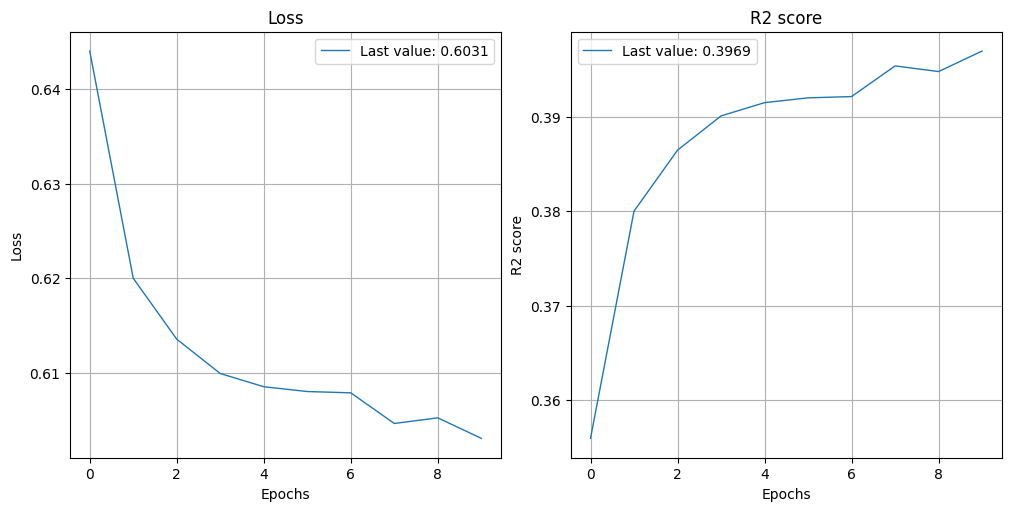

In [23]:
show_history(history) # single_graphs=True
plt.close()

In [24]:
interest_histories = []
for holdout in range(2):
    model = interest_model
    interest_histories.append(model.fit(X_train_scaled, y_train, epochs=10))

plot_history(
    interest_histories,
    show_standard_deviation=False,
    show_average=True
)
plt.close()

Epoch 1/10
47901/47901 [==============================] - 45s 932us/step - loss: 15.0261 - r2_score: 0.3620
Epoch 2/10
47901/47901 [==============================] - 44s 916us/step - loss: 14.3399 - r2_score: 0.3911
Epoch 3/10
47901/47901 [==============================] - 42s 879us/step - loss: 14.2664 - r2_score: 0.3943
Epoch 4/10
47901/47901 [==============================] - 41s 853us/step - loss: 14.2414 - r2_score: 0.3953
Epoch 5/10
47901/47901 [==============================] - 41s 853us/step - loss: 14.1935 - r2_score: 0.3973
Epoch 6/10
47901/47901 [==============================] - 40s 841us/step - loss: 14.2187 - r2_score: 0.3962
Epoch 7/10
47901/47901 [==============================] - 40s 835us/step - loss: 14.1827 - r2_score: 0.3979
Epoch 8/10
47901/47901 [==============================] - 41s 862us/step - loss: 14.1463 - r2_score: 0.3993
Epoch 9/10
47901/47901 [==============================] - 44s 922us/step - loss: 14.1432 - r2_score: 0.3995
Epoch 10/10
47901/47901 [===